In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report

In [189]:
ls

Company_Data.csv                     assignment2/
DECISION TREE -FRAUD CHECK.ipynb     finished assignment/
Fraud_check.csv                      problem statement(company data).txt
Problem_statement(Fraudcheck).txt    unsubmitted assignment/


In [190]:
fc=pd.read_csv("Fraud_check.csv")
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EXPLORATORY DATA ANALYSIS

In [191]:
fc.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
282,YES,Married,64667,59590,29,NO
323,YES,Married,47425,165175,13,NO
383,YES,Married,97453,148246,5,YES
314,NO,Single,59689,85255,4,NO
253,YES,Single,79869,77256,29,NO


In [192]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [193]:
fc.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [194]:
fc.shape

(600, 6)

In [195]:
fc.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [196]:
fc.duplicated().sum()

0

In [197]:
cat_features = fc.describe(include=["object"]).columns
cat_features

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [198]:
num_features = fc.describe(include=["int64"]).columns
num_features

Index(['Taxable.Income', 'City.Population', 'Work.Experience'], dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


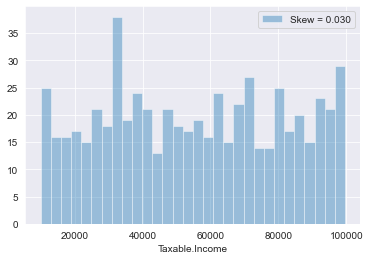

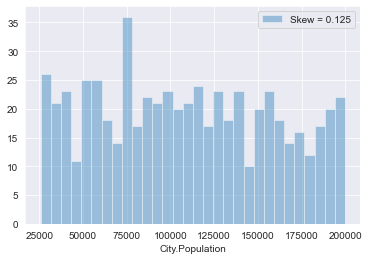

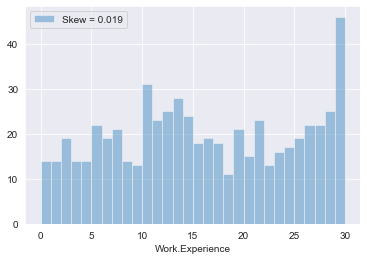

In [199]:
for feat in num_features:
    skew =fc[feat].skew()
    sns.distplot(fc[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

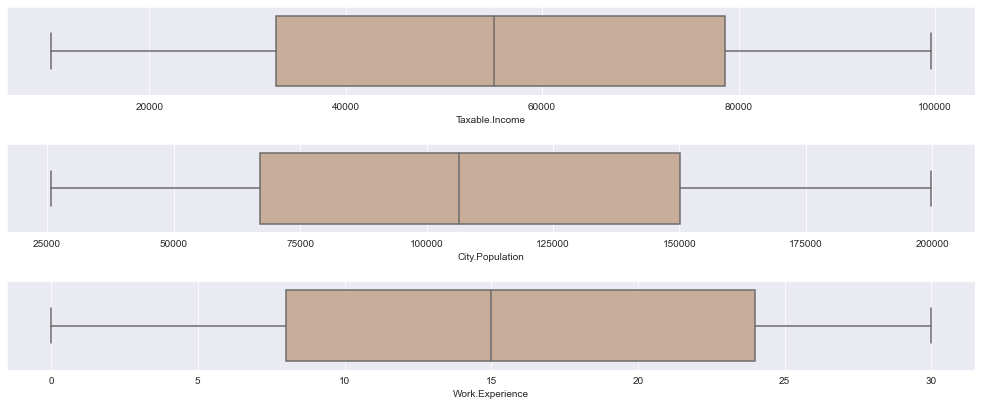

In [200]:
ot=fc.copy() 
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=ot,palette='pink',ax=axes[0])
sns.boxplot(x='City.Population',data=ot,palette='pink',ax=axes[1])
sns.boxplot(x='Work.Experience',data=ot,palette='pink',ax=axes[2])
plt.tight_layout(pad=2.0)

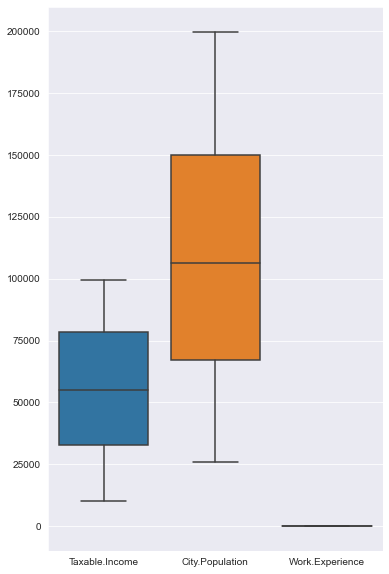

In [201]:
plt.figure(figsize=(6,10))
sns.boxplot(data=fc[num_features], orient="v");

<AxesSubplot:>

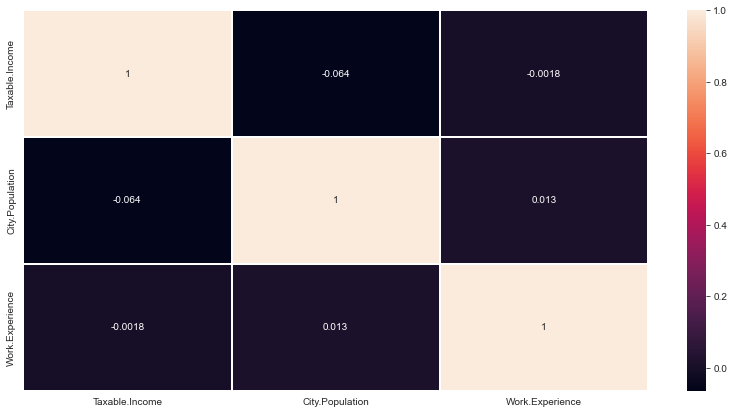

In [202]:
fig, ax = plt.subplots(figsize=(14,7))
sns.heatmap(fc.corr(),annot=True,linewidths=.1, linecolor='white')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


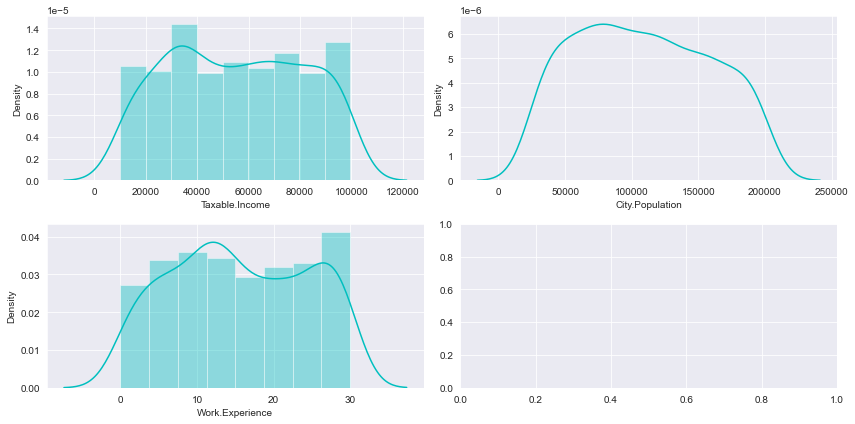

In [203]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))

sns.distplot(fc["Taxable.Income"], ax=ax[0,0],color='c')
sns.kdeplot(fc["City.Population"], ax=ax[0,1],color='c')
sns.distplot(fc["Work.Experience"], ax=ax[1,0],color='c')


plt.tight_layout()
plt.show()

In [204]:
#we put any taxable income less than 30000 as risky and above as good
fc1=fc.copy()
#create a new column as taxable_category
fc1['taxable_category'] = pd.cut(x = fc1['Taxable.Income'], bins = [10002,30000,99620], labels = ['Risky', 'Good'])
fc1.sample(6)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,taxable_category
512,YES,Single,91870,137948,22,YES,Good
28,YES,Single,10379,128766,5,YES,Risky
278,NO,Married,25062,114823,11,NO,Risky
471,NO,Single,17957,192410,21,YES,Risky
165,YES,Married,91304,38463,23,YES,Good
522,NO,Divorced,43980,103343,10,NO,Good


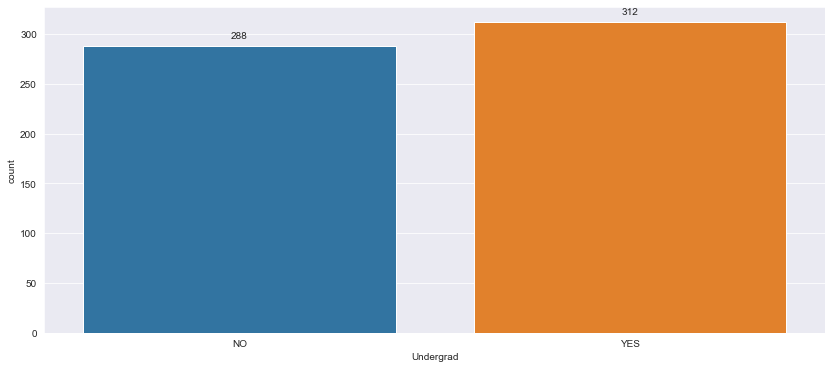

In [205]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x=fc1["Undergrad"])
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


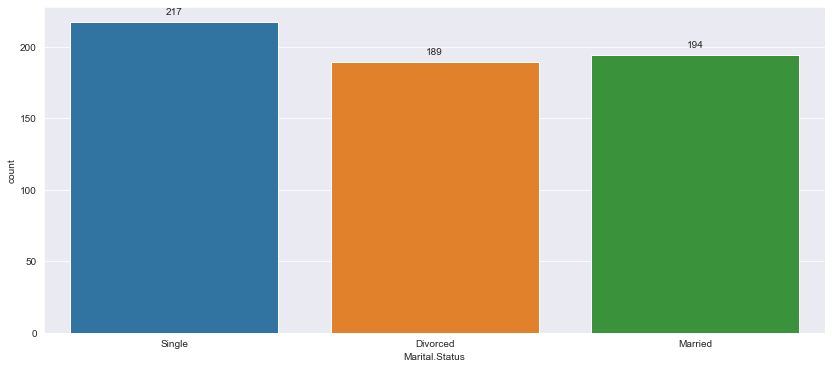

In [206]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x=fc1["Marital.Status"])
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

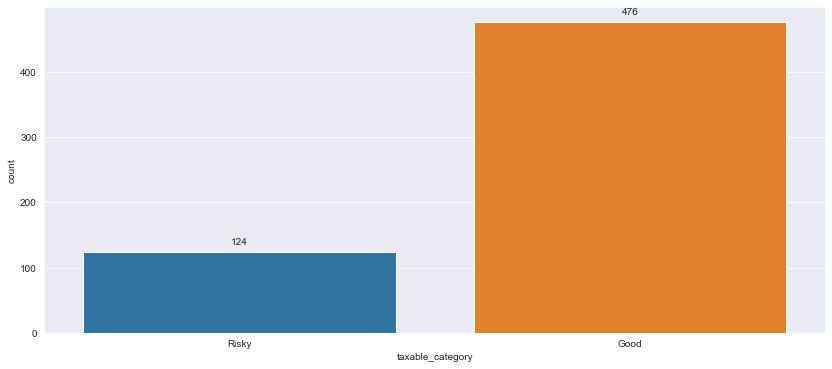

In [207]:
plt.figure(figsize=(14,6))
ax = sns.countplot(x=fc1["taxable_category"])
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

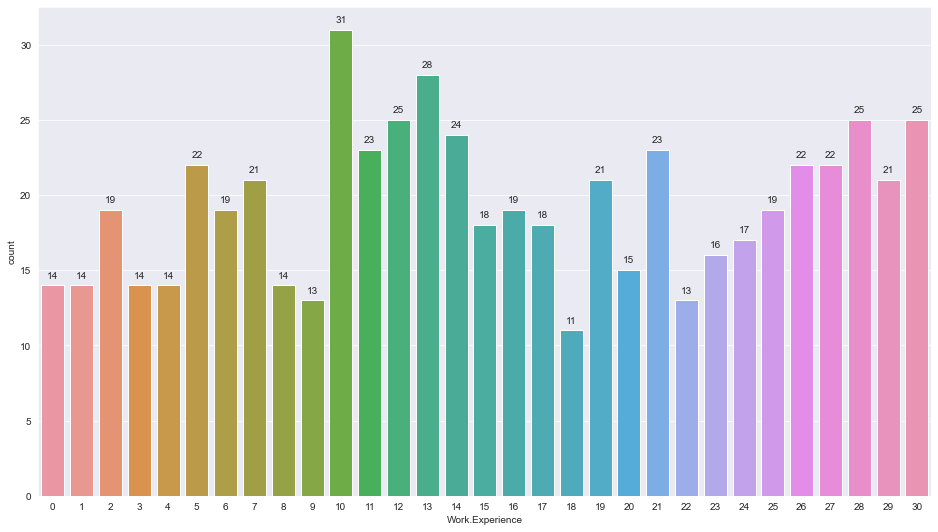

In [208]:
plt.figure(figsize=(16,9))
ax = sns.countplot(x=fc1["Work.Experience"])
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [209]:
#encoding qualitative variables into binary format
label_encoder = preprocessing.LabelEncoder()
fc['Undergrad']= label_encoder.fit_transform(fc['Undergrad']) 
fc['Marital.Status']= label_encoder.fit_transform(fc['Marital.Status']) 
fc['Urban']= label_encoder.fit_transform(fc['Urban']) 

In [210]:
fc

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [211]:
fc["Taxable.Income"]=(fc["Taxable.Income"]>30000)*1

In [212]:
fc.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
120,1,2,1,135886,11,1
440,0,2,1,170407,13,1
452,0,2,1,42620,10,0
371,1,2,1,75580,5,0
186,0,1,1,166976,19,1


In [213]:
#creating x and y variables 
x=fc.drop(axis=1,columns="Taxable.Income")
y=fc["Taxable.Income"]

In [214]:
pd.DataFrame(x).sample(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
447,0,1,166606,5,1
426,1,0,50373,25,1
30,1,0,117788,0,1
424,1,1,94199,0,1
298,0,2,119904,21,1


In [215]:
pd.DataFrame(y).sample(5)

,Taxable.Income
165,1
344,1
381,1
444,0
550,1


In [216]:
#splitting data into train and test
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=20)

In [217]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

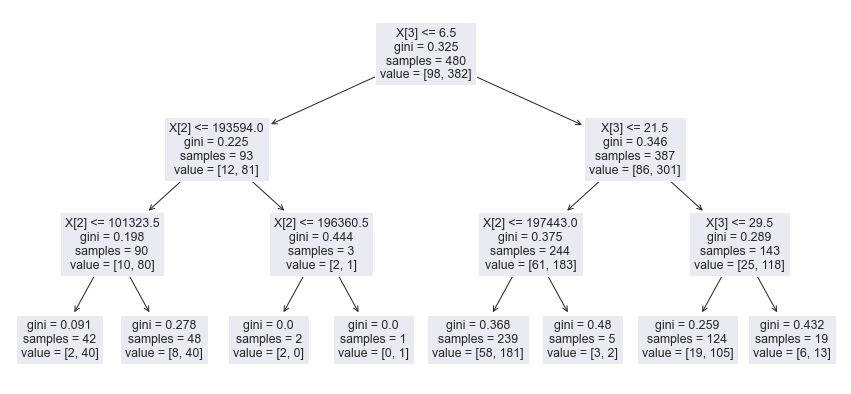

In [218]:
plt.figure(figsize=(15,7))
tree.plot_tree(model);


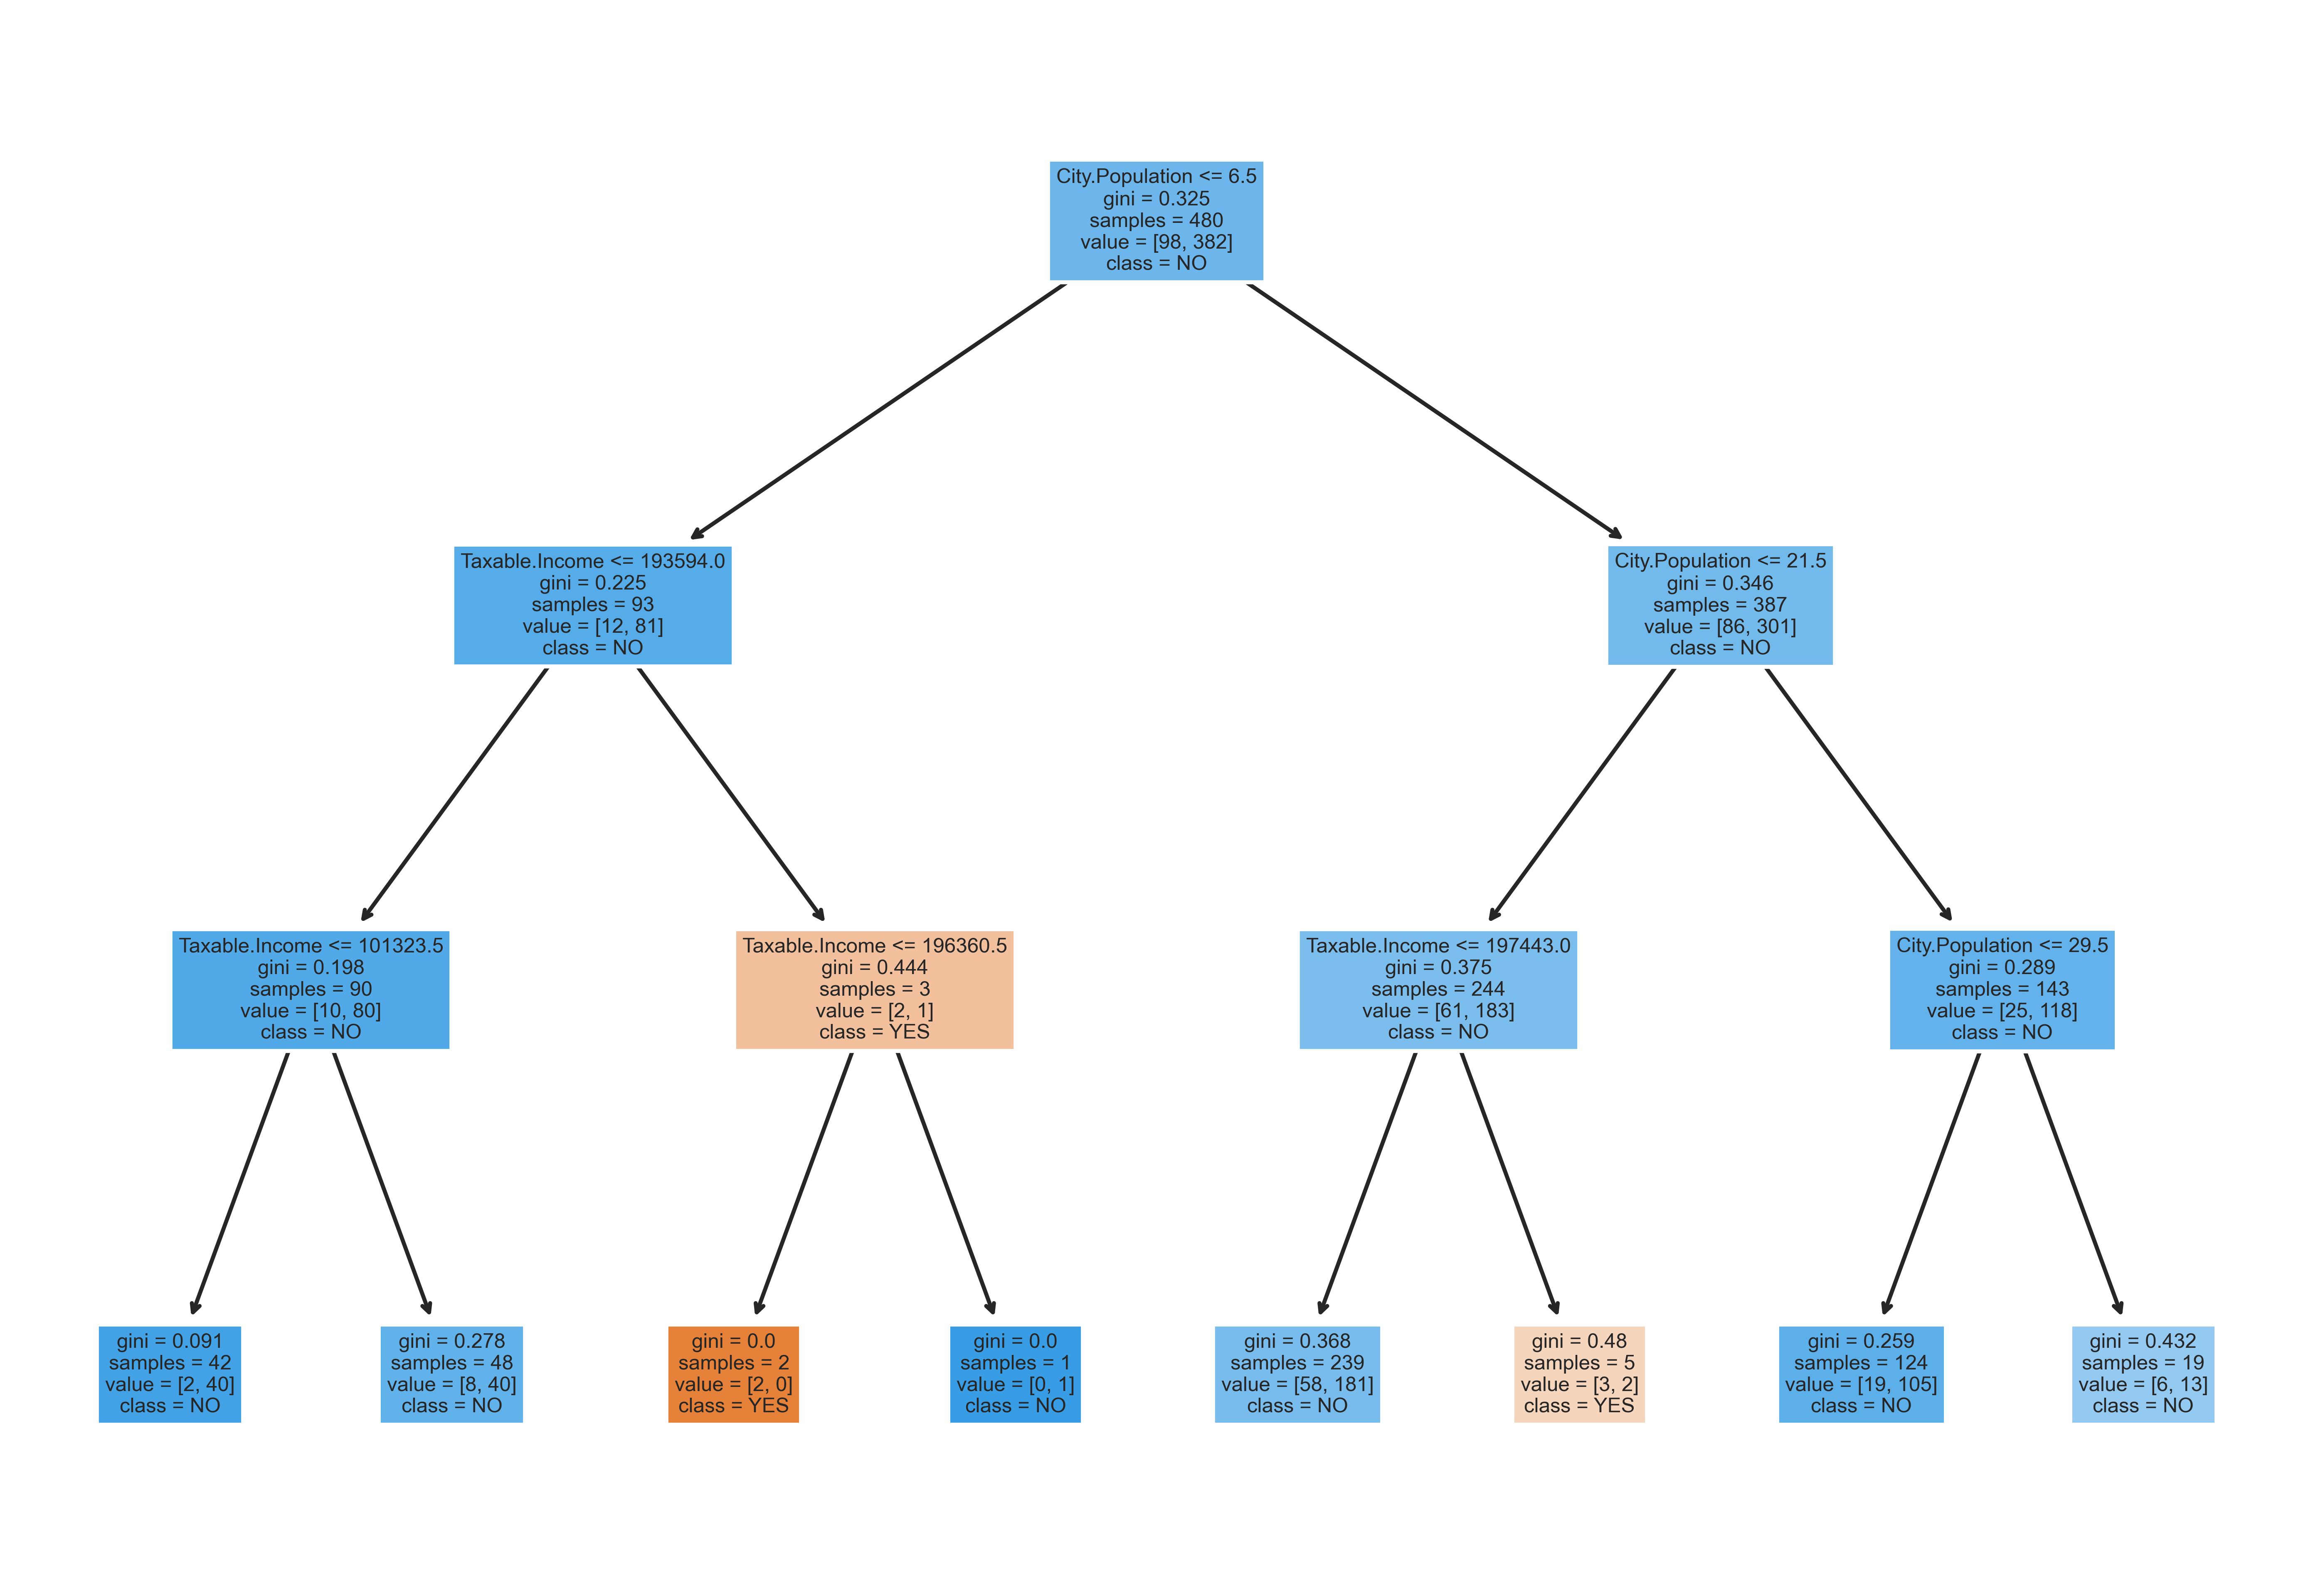

In [219]:
fn=["Undergrad","Marital.Status","Taxable.Income","City.Population","Work.Experience"]
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,7), dpi=700)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [220]:
#fitting the data on the model
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.8020833333333334

In [221]:
#checking the score 
model.score(x_test, y_test)

0.7833333333333333

In [222]:
y_pred = model.predict(x_test)
y_pred
('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

('Accuracy Score:', 0.7833333333333333)

In [223]:
model.predict([[1,0,1,0,1]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [224]:
model.predict_proba(x_test)

array([[0.15322581, 0.84677419],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.16666667, 0.83333333],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.31578947, 0.68421053],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.15322581, 0.84677419],
       [0.04761905, 0.95238095],
       [0.24267782, 0.75732218],
       [0.31578947, 0.68421053],
       [0.15322581, 0.84677419],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.24267782, 0.75732218],
       [0.04761905, 0.95238095],
       [0.

In [225]:
#evaluating the metrics with confusion matrix
cm= confusion_matrix(y_test, y_pred) 
cm

array([[ 0, 26],
       [ 0, 94]])

Text(0.5, 1.0, 'Accuracy Score: 0.7833333333333333')

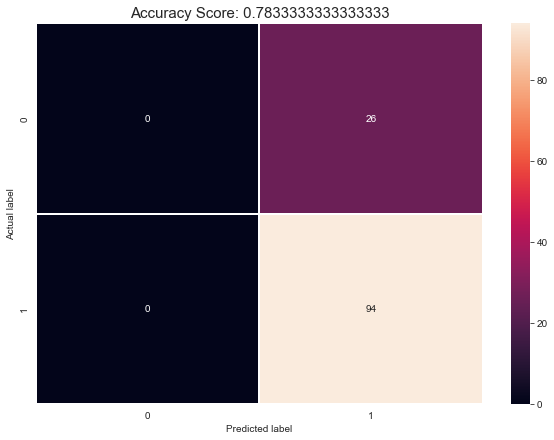

In [226]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(data=cm,linewidths=.1, annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [227]:
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.78      1.00      0.88        94

    accuracy                           0.78       120
   macro avg       0.39      0.50      0.44       120
weighted avg       0.61      0.78      0.69       120



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 40)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [229]:
accuracies = pd.DataFrame({'max_depth':range(1,11),'train_accuracy':train_accuracy, 'test_accuracy':test_accuracy})
accuracies

,max_depth,train_accuracy,test_accuracy
0,1,0.795833,0.783333
1,2,0.795833,0.783333
2,3,0.797917,0.783333
3,4,0.800000,0.783333
4,5,0.802083,0.775000
5,6,0.806250,0.775000
6,7,0.810417,0.766667
7,8,0.818750,0.741667
8,9,0.833333,0.750000
9,10,0.845833,0.750000


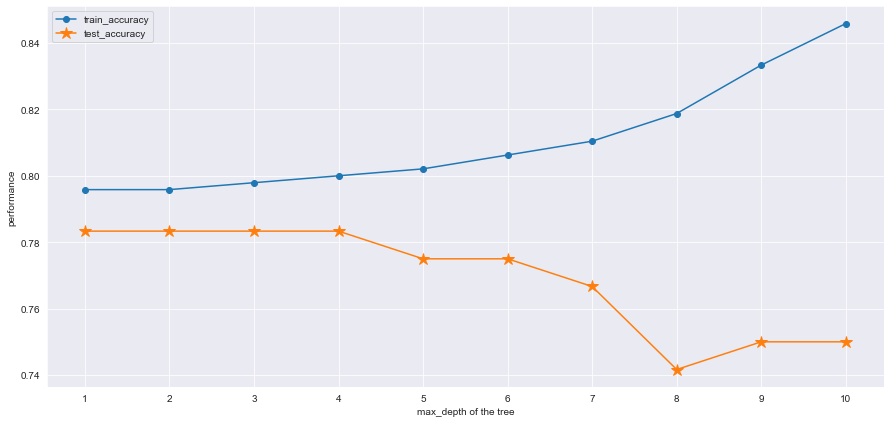

In [231]:
labels =['train_accuracy','test_accuracy']
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot()
plt.plot(accuracies['max_depth'],accuracies['train_accuracy'], marker = 'o')
plt.plot(accuracies['max_depth'], accuracies['test_accuracy'], marker = '*',markersize=12)
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()